# 1.Import Libraries

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 2.Import Data

In [161]:
data = pd.read_csv("D:\\Spam detection\\spam.csv",encoding='latin-1')

In [162]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Let's remove the unwanted columns

In [163]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


let' rename the column name

In [164]:
data.rename(columns={
    'v1':'label',
    'v2':'text'
},inplace=True)
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [165]:
#Count Observation in each label

Ham,Spam=data.label.value_counts()
Ham,Spam

(4825, 747)

Pi chart of Ham and Spam

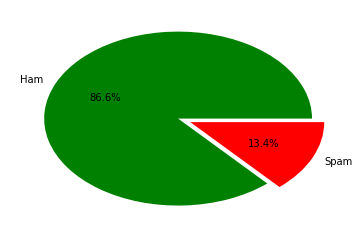

In [166]:
labels='Ham','Spam'
size=[Ham,Spam]
color=['green','red']
plt.pie(size,labels=labels,colors=color,explode=[0,0.1],autopct='%1.1f%%')
plt.show()

In [167]:
#Conver the label to numerical value
data['label_num']=data.label.map({'ham':0,'spam':1})
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## 3.Train Test Split

Before performing text transformation, let us do train test split.

In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['text'],data['label'],test_size=0.2,random_state=10)


In [169]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457,)
(4457,)
(1115,)
(1115,)


# 4.Text transformation

Various text transformation techniques such as stop word removal, lowering the texts, tfidf transformations, prunning, stemming can be performed using sklearn.feature_extraction libraries. Then, the data can be convereted into bag-of-words. 

In [170]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [171]:
vect.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

vect.fit learns the vocabulary. we can get all the feature names from vect.get_feature_names()

let's print first twenty and last twenty feature

In [172]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[-20: ])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703']
['zyada', 'åð', 'åòharry', 'åòit', 'åômorrow', 'åôrents', 'ì_', 'ì¼1', 'ìä', 'ìï', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò', 'ûówell']


In [173]:
x_train_df=vect.transform(x_train)


Let's transform the test data

In [174]:
x_test_df = vect.transform(x_test)
type(x_test_df)

scipy.sparse.csr.csr_matrix

# 5.Visualisation

In [175]:
ham_words=''
spam_words=''

ham=data[data.label_num==0]
spam=data[data.label_num==1]


In [176]:
import nltk

from nltk.corpus import stopwords

In [177]:
for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words+words+' '
    

In [178]:

from wordcloud import WordCloud


In [179]:
spam_wordcloud = WordCloud(width=600,height=400).generate(spam_words)
ham_wordcloud= WordCloud(width=600,height=400).generate(ham_words)

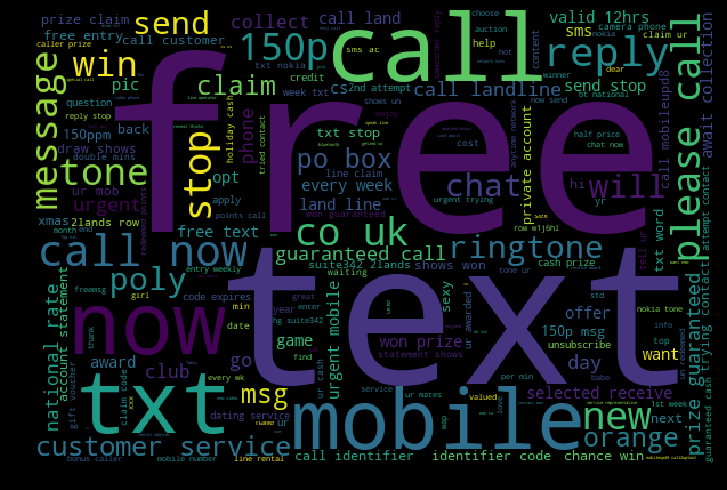

In [180]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

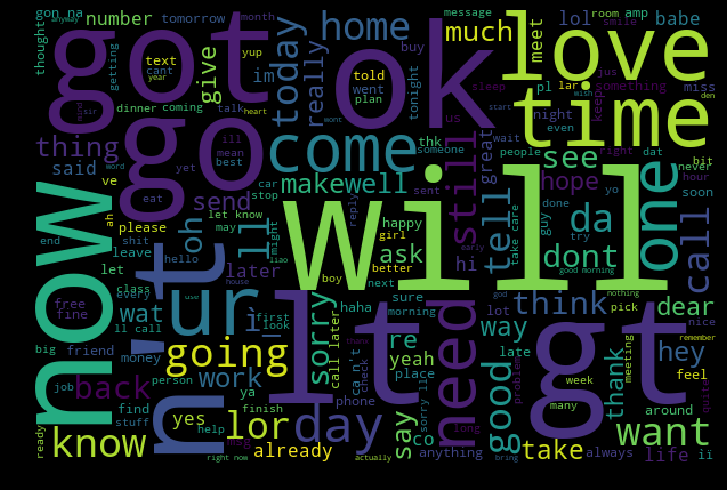

In [181]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 6. Machine Learning Model 

##       6.1Logistics Regression Model

In [182]:
prediction = dict()
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_df,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [183]:
prediction["Logistic"]=model.predict(x_test_df)

In [186]:
from sklearn.metrics import accuracy_score

In [187]:
accuracy_score(y_test,prediction["Logistic"])

0.9802690582959641